In [7]:
import sys
import pandas as pd
import matplotlib as plt
import seaborn as sns
from datetime import date, datetime, timedelta
import matplotlib.dates as mdates

import config as cfg
from SE_Interface import *

In [8]:
se_interface = SE_Interface()

summer = datetime(year=2021, month=8, day=15, hour=23)
now = datetime.now()
data = se_interface.request_SitePowerDetailed(now, timedelta(days=1))
#data = se_interface.request_SitePowerDetailed(summer, timedelta(days=1))

Requesting: https://monitoringapi.solaredge.com/site/2130766/powerDetails?meters=Consumption,Production&startTime=2021-12-14 19:03:04&endTime=2021-12-15 19:03:04&api_key=NTT5LNJGA5CDCFI9OZGZCX2W1VD3CCW2


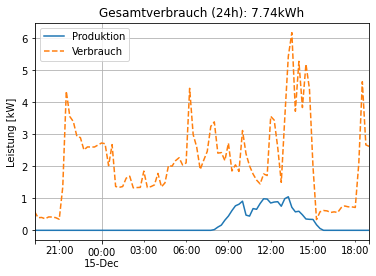

In [9]:
#summer = datetime(year=2021, month=8, day=15, hour=23, minute=15)
#data = se_interface.request_SitePowerDetailed(summer, timedelta(days=1))

df = data.copy()
df = df / 1000 # set to KWh
df = df.iloc[1: , :]    # Drop first row

# Plot lines
df.plot(style=["-", "--"])

# Add total consumption
total = (df["Consumption"].sum() - df["Production"].sum()) / (24)
plt.title(f"Gesamtverbrauch (24h): {total:.2f}kWh")

# Formatting
plt.grid()
plt.xlabel("")
plt.ylabel("Leistung [kW]")
plt.legend(labels=["Produktion", "Verbrauch"])

# Output
plt.savefig("../out/plot.png")
plt.show()